In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('weather_forecast_data.csv')

In [3]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [4]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [6]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'cloud_cover', 'pressure',
       'rain'],
      dtype='object')

In [8]:
num_cols = df.dtypes[df.dtypes != 'object'].index.to_list()

In [9]:
for col in num_cols:
    df[col] = np.round(df[col], 2)
    

In [10]:
df.head()

,temperature,humidity,wind_speed,cloud_cover,pressure,rain
0,23.72,89.59,7.34,50.50,1032.38,rain
1,27.88,46.49,5.95,4.99,992.61,no rain
2,25.07,83.07,1.37,14.86,1007.23,no rain
3,23.62,74.37,7.05,67.26,982.63,rain
4,20.59,96.86,4.64,47.68,980.83,no rain


In [11]:
df.isnull().sum()

temperature    0
humidity       0
wind_speed     0
cloud_cover    0
pressure       0
rain           0
dtype: int64

In [12]:
df['rain'].value_counts()

rain
no rain    2186
rain        314
Name: count, dtype: int64

In [13]:
df['rain'] = (df['rain'] == 'rain').astype('int64')

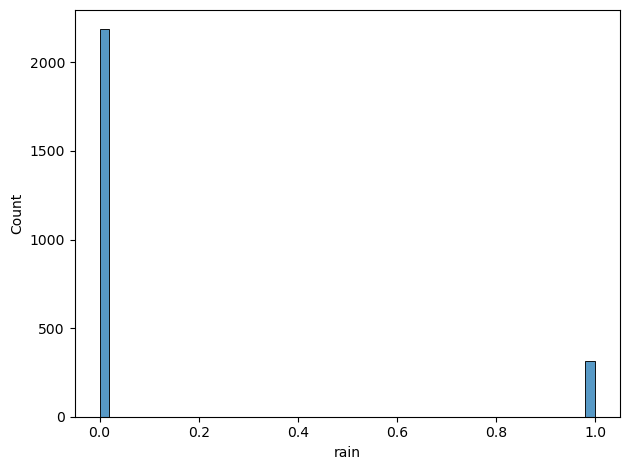

In [18]:
sns.histplot(df['rain'], bins=50)
plt.tight_layout()
plt.show()

In [19]:
df[num_cols].corr()

,temperature,humidity,wind_speed,cloud_cover,pressure
temperature,1.000000,-0.014120,-0.004938,0.006628,-0.007479
humidity,-0.014120,1.000000,0.003810,0.007244,-0.032084
wind_speed,-0.004938,0.003810,1.000000,-0.000403,0.018769
cloud_cover,0.006628,0.007244,-0.000403,1.000000,0.023098
pressure,-0.007479,-0.032084,0.018769,0.023098,1.000000


In [20]:
df.corr()

,temperature,humidity,wind_speed,cloud_cover,pressure,rain
temperature,1.000000,-0.014120,-0.004938,0.006628,-0.007479,-0.265873
humidity,-0.014120,1.000000,0.003810,0.007244,-0.032084,0.382466
wind_speed,-0.004938,0.003810,1.000000,-0.000403,0.018769,-0.001386
cloud_cover,0.006628,0.007244,-0.000403,1.000000,0.023098,0.326214
pressure,-0.007479,-0.032084,0.018769,0.023098,1.000000,0.008275
rain,-0.265873,0.382466,-0.001386,0.326214,0.008275,1.000000


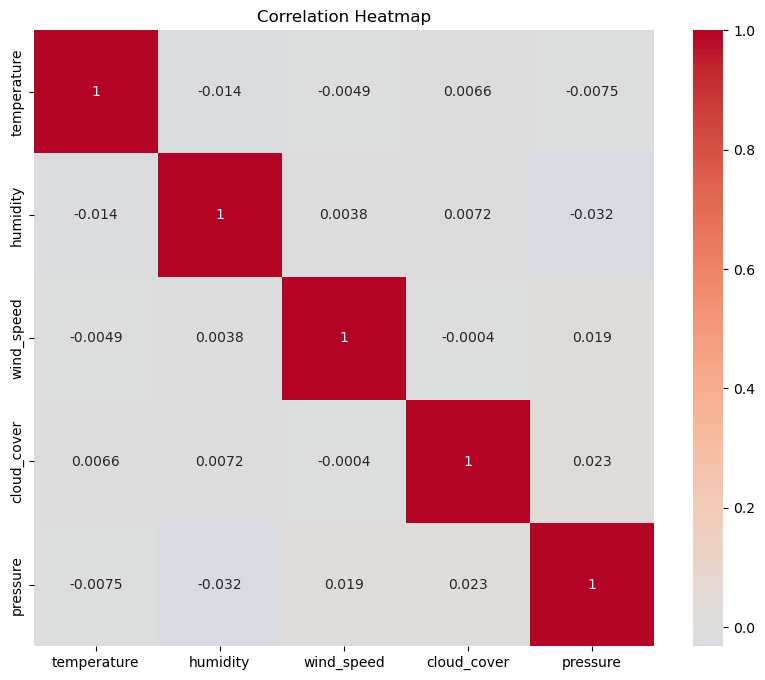

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

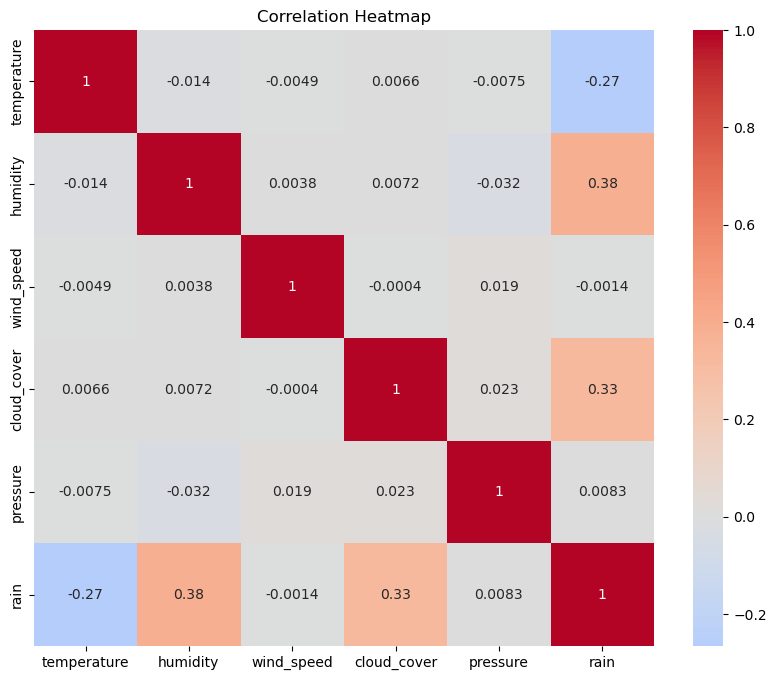

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

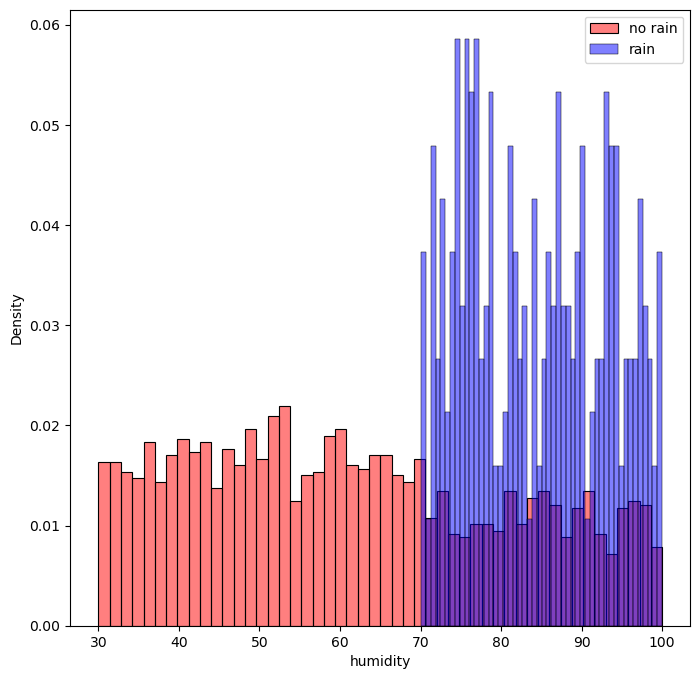

In [23]:
plt.figure(figsize=(8,8))

sns.histplot(df.humidity[df.rain==0],
            stat='density', bins = 50,
            color = 'red', alpha=0.5,
            label='no rain')

sns.histplot(df.humidity[df.rain==1],
            stat='density', bins = 50,
            color = 'blue', alpha=0.5,
            label='rain')

plt.legend()
plt.show()

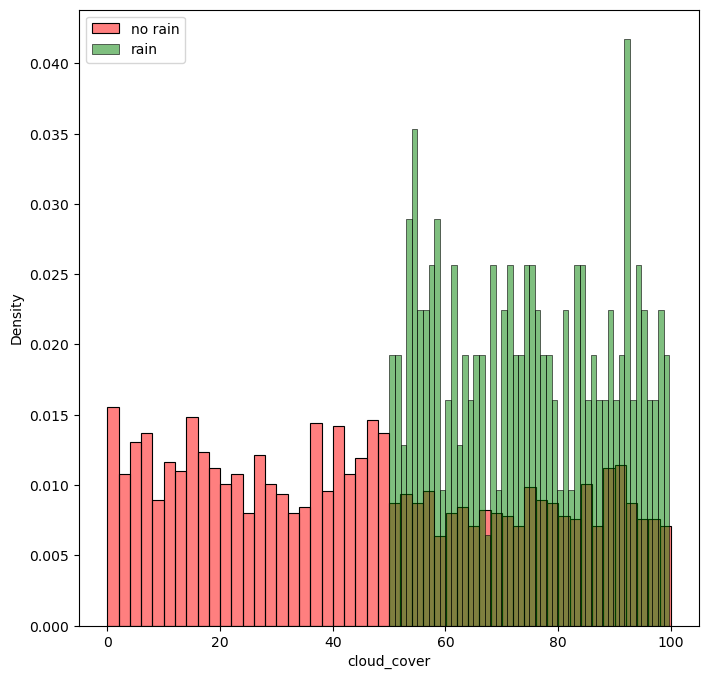

In [24]:
plt.figure(figsize=(8,8))

sns.histplot(df.cloud_cover[df.rain==0],
            stat='density', bins = 50,
            color = 'red', alpha=0.5,
            label='no rain')

sns.histplot(df.cloud_cover[df.rain==1],
            stat='density', bins = 50,
            color = 'green', alpha=0.5,
            label='rain')

plt.legend()
plt.show()

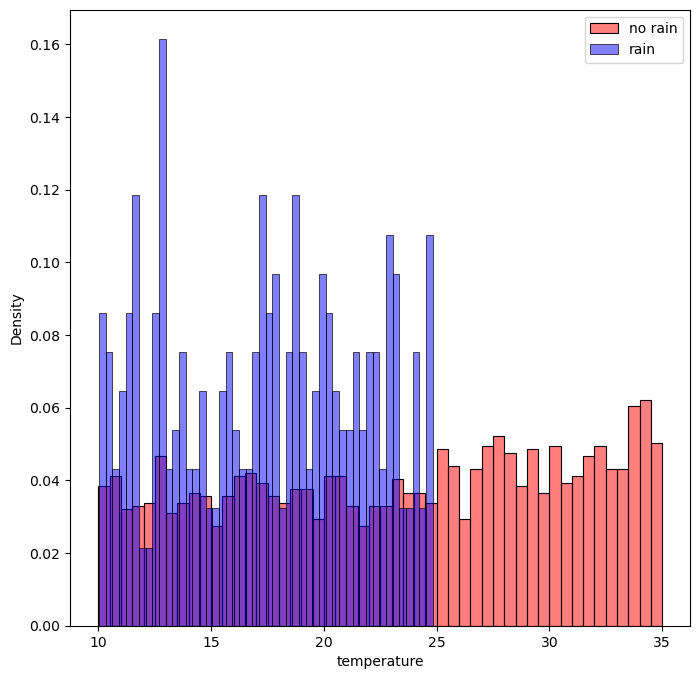

In [25]:
plt.figure(figsize=(8,8))

sns.histplot(df.temperature[df.rain==0],
            stat='density', bins = 50,
            color = 'red', alpha=0.5,
            label='no rain')

sns.histplot(df.temperature[df.rain==1],
            stat='density', bins = 50,
            color = 'blue', alpha=0.5,
            label='rain')

plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(df_train), len(df_test), len(df_val)

(1500, 500, 500)

In [29]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head()

,temperature,humidity,wind_speed,cloud_cover,pressure,rain
0,23.74,32.06,17.36,56.17,980.74,0
1,21.58,46.71,10.33,36.43,1034.17,0
2,10.36,67.81,2.13,27.81,986.51,0
3,30.50,56.62,14.65,92.54,999.33,0
4,12.51,67.87,1.42,44.20,983.81,0


In [30]:
y_train = df_train['rain']
del df_train['rain']
y_test = df_test['rain']
del df_test['rain']
y_val = df_val['rain']
del df_val['rain']

In [66]:
import xgboost as xgb
from tqdm.auto import tqdm
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, root_mean_squared_error, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
dv = DictVectorizer(sparse=False)

In [34]:
train_dict = df_train.to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)
X_train[:5]

array([[  56.17,   32.06,  980.74,   23.74,   17.36],
       [  36.43,   46.71, 1034.17,   21.58,   10.33],
       [  27.81,   67.81,  986.51,   10.36,    2.13],
       [  92.54,   56.62,  999.33,   30.5 ,   14.65],
       [  44.2 ,   67.87,  983.81,   12.51,    1.42]])

In [35]:
dv.get_feature_names_out()

array(['cloud_cover', 'humidity', 'pressure', 'temperature', 'wind_speed'],
      dtype=object)

In [ ]:

val_dict = df_val.to_dict(orient= 'records')
X_val = dv.transform(val_dict)
test_dict = df_test.to_dict(orient= 'records')
X_test = dv.transform(test_dict)

In [37]:
logmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [38]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [39]:
logpred = logmodel.predict_proba(X_val)
logpred = logpred[:,1]

In [40]:
roc_auc_score(y_val, logpred)

0.9637101890623018

In [41]:
def train(df_train, y_train, C=1.0):
    
    dicts = df_train.to_dict(orient='records')
    
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [42]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [45]:
def fold(df_full_train, splits=2):
    kfold = KFold(n_splits=splits, shuffle=True, random_state=42)

    for C in tqdm([0.000001, 0.001, 1, 10]):
        scores = []
        
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]
        
            y_train = df_train.rain.values
            del df_train['rain']
            y_val = df_val.rain.values
            del df_val['rain']
        
            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)
        
            auc = roc_auc_score(y_val, y_pred)
            scores.append((auc))
        print(scores)
            
        print(f"C={C:>4}, {np.mean(scores):.3f} +- {np.std(scores):3f}")

In [46]:
fold(df_full_train, splits=5)

  0%|          | 0/4 [00:00<?, ?it/s]

[0.8845288825757576, 0.8859803921568628, 0.9175586854460094, 0.9110285714285714, 0.9108131322771522]
C=1e-06, 0.902 +- 0.013879
[0.9591027462121212, 0.960343137254902, 0.962754303599374, 0.9621142857142857, 0.9722752433670548]
C=0.001, 0.963 +- 0.004661
[0.9592211174242424, 0.9635784313725491, 0.9616901408450704, 0.9601714285714286, 0.9732773430043902]
C=   1, 0.964 +- 0.005064
[0.9592211174242424, 0.9635784313725491, 0.9616901408450704, 0.9601714285714286, 0.9732773430043902]
C=  10, 0.964 +- 0.005064


In [47]:
logmodel = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)

In [48]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')

In [49]:
logpred = logmodel.predict_proba(X_val)[:,1]
roc_auc_score(y_val, logpred)

0.9637419109250095

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)

In [62]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- humidity <= 70.29
|   |--- class: 0
|--- humidity >  70.29
|   |--- cloud_cover <= 50.27
|   |   |--- class: 0
|   |--- cloud_cover >  50.27
|   |   |--- temperature <= 24.90
|   |   |   |--- class: 1
|   |   |--- temperature >  24.90
|   |   |   |--- class: 0



In [64]:
scores = []
for m in range(1,6,1):
    dt = DecisionTreeClassifier(max_depth=m)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict_proba(X_val)[:,1]
    auc = round(roc_auc_score(y_val, dt_pred), 3)
    scores.append((m, auc))
scores

[(1, 0.825), (2, 0.93), (3, 0.98), (4, 0.98), (5, 0.98)]

In [65]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict_proba(X_val)[:,1]
auc = round(roc_auc_score(y_val, dt_pred), 3)
auc

0.98

In [67]:
rf = RandomForestClassifier(n_estimators=10,
                           random_state=1,
                           n_jobs=-1)

In [68]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [69]:
rf_pred = rf.predict_proba(X_val)[:,1]

In [70]:
roc_auc_score(y_val, rf_pred)

0.9856617180560843

In [85]:
scores = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,
                           random_state=1,
                           n_jobs=-1)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict_proba(X_val)[:,1]
    auc = round(roc_auc_score(y_val, rf_pred), 3)
    scores.append((n, auc))

scores

[(10, 0.986),
 (20, 0.999),
 (30, 0.999),
 (40, 1.0),
 (50, 1.0),
 (60, 1.0),
 (70, 1.0),
 (80, 1.0),
 (90, 1.0),
 (100, 1.0),
 (110, 1.0),
 (120, 1.0),
 (130, 1.0),
 (140, 1.0),
 (150, 1.0),
 (160, 1.0),
 (170, 1.0),
 (180, 1.0),
 (190, 1.0),
 (200, 1.0)]

In [87]:
scores = []
max_depths= [5, 10, 15, 20, 25]
for m in max_depths:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth=m,
                                   random_state=1,
                                n_jobs=-1)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict_proba(X_val)[:,1]
        auc = round(roc_auc_score(y_val, rf_pred), 3)
        scores.append((n, m, auc))

In [88]:
scores_dt = pd.DataFrame(scores, columns=['n_est', 'max_depth', 'auc'])

In [90]:
scores_dt.sort_values('auc', ascending=False)

,n_est,max_depth,auc
50,110,15,1.000
63,40,20,1.000
72,130,20,1.000
71,120,20,1.000
70,110,20,1.000
...,...,...,...
0,10,5,0.988
80,10,25,0.986
40,10,15,0.986
60,10,20,0.986


In [91]:
rf_model = RandomForestClassifier(n_estimators=10,
                                 max_depth=5,
                                 random_state=1,
                                 n_jobs=-1)

In [92]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, random_state=1)

In [93]:
importances = rf_model.feature_importances_

In [94]:
feature_importance_d = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': importances
})

In [95]:
feature_importance_d

,Feature,Importance
0,cloud_cover,0.369225
1,humidity,0.344798
2,pressure,0.013115
3,temperature,0.263314
4,wind_speed,0.009548


In [96]:
rfmodel_pred = rf_model.predict_proba(X_val)[:,1]
round(roc_auc_score(y_val, rfmodel_pred), 3)

0.988

In [98]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [99]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [100]:
xgb_params = {
    'eta': 0.1,                    
    'max_depth': 5,                 
    'min_child_weight': 1,          
    
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',       
    'nthread': 8,                  
    
    'seed': 1,         
    'verbosity': 1,           
}

In [101]:
xgbmodel = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-logloss:0.32281	val-logloss:0.34769
[5]	train-logloss:0.16438	val-logloss:0.18062
[10]	train-logloss:0.09428	val-logloss:0.10904
[15]	train-logloss:0.05630	val-logloss:0.07135
[20]	train-logloss:0.03448	val-logloss:0.05050
[25]	train-logloss:0.02160	val-logloss:0.03887
[30]	train-logloss:0.01387	val-logloss:0.03247
[35]	train-logloss:0.00916	val-logloss:0.02909
[40]	train-logloss:0.00627	val-logloss:0.02743
[45]	train-logloss:0.00453	val-logloss:0.02682
[50]	train-logloss:0.00347	val-logloss:0.02668
[55]	train-logloss:0.00286	val-logloss:0.02686
[60]	train-logloss:0.00247	val-logloss:0.02654
[65]	train-logloss:0.00220	val-logloss:0.02666
[70]	train-logloss:0.00202	val-logloss:0.02702
[75]	train-logloss:0.00193	val-logloss:0.02732
[80]	train-logloss:0.00186	val-logloss:0.02741
[85]	train-logloss:0.00180	val-logloss:0.02763
[90]	train-logloss:0.00176	val-logloss:0.02775
[95]	train-logloss:0.00173	val-logloss:0.02781
[99]	train-logloss:0.00171	val-logloss:0.02788


In [103]:
xpred = xgbmodel.predict(dval)

In [104]:
roc_auc_score(y_val, xpred)

0.9937349321152137

In [107]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [108]:
xpredt = xgbmodel.predict(dtest)

In [109]:
roc_auc_score(y_test, xpredt)

1.0

In [110]:
import pickle

filename = 'xgbmodel.bin'

pickle.dump(xgbmodel, open(filename, 'wb'))

In [111]:
pickle.dump(rf_model, open('rfcmodel.bin', 'wb'))

In [112]:
pickle.dump(dv, open('dv.bin', 'wb'))